# Environmental Science Lab
## Training exercise

**Student name(s): Camillo de Anna** 

**Date: 1/3/2026** 

---
## 1) Objective
Measure the desntiy of a set of milliQ-water and glycerol mixtures.

## 2) Experimental Setup
- 10 tubes
- milliQ-water
- Glycerol
- scale
- micropipette of 1 uL 

## 3) Procedure
1) prepare 5 tubes with 2 g of milliQ water and 5 tubes with 2 g of Glycerol
2) add to the "milliQ-water tubes" the following masses of Glycerol: [0,0.1,0.3,0.5,1]
3) add to the "Glycerol tubes" the following masses of milliQ-water: [2,0.9,0.6,0.1,0]
4) mix well each solution to get a mixture
5) for each mixture "i", widthraw a volume Vi = 1 mL and weight its mass Mi
6) compute the density as rho_i = Mi / Vi

---
## 4) Enter Your Data
Enter paired measurements of volume and mass.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Enter your measured data below
V = [1,1,1,1,1,1,1,1,1,1]
M = [1, 1.03,1.06,1.09,1.10,1.10,1.12,1.13,1.18,1.26]

V = np.array(V, dtype=float)
M = np.array(M, dtype=float)

assert M.size == V.size, "Flow and pressure arrays must be the same length"
assert M.size >= 3, "Enter at least 3 data points"

rho = M / V

df = pd.DataFrame({"density": rho, "Mass": M, "Volume": V})
df

,density,Mass,Volume
0,1.00,1.00,1.0
1,1.03,1.03,1.0
2,1.06,1.06,1.0
3,1.09,1.09,1.0
4,1.10,1.10,1.0
5,1.10,1.10,1.0
6,1.12,1.12,1.0
7,1.13,1.13,1.0
8,1.18,1.18,1.0
9,1.26,1.26,1.0


## 5) Plot density vs mass fraction

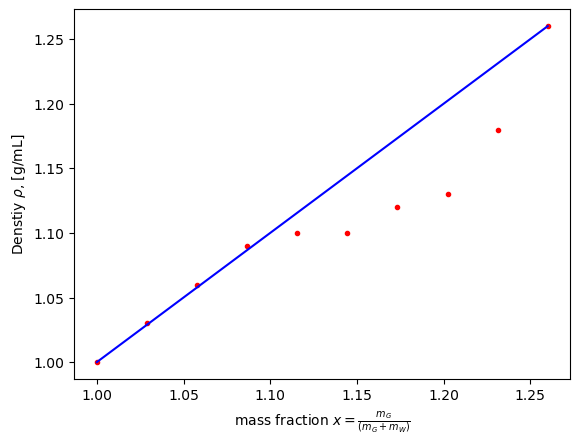

In [10]:
mG = [0,0.1,0.3,0.5,1,2,2,2,2,2]
mW = [2,2,2,2,2,2,0.9,0.6,0.1,0]
mG = np.array(mG, dtype=float)
mW = np.array(mW, dtype=float)

rhoW = 1
rhoG = 1.26
x = mG / (mG + mW)
y = x = np.linspace(rhoW,rhoG,10)

plt.figure(1)
plt.plot(x,rho,'r.')
plt.plot(x,y,'b')

plt.xlabel(r"mass fraction $x = \frac{m_G}{(m_G + m_W)}$")
plt.ylabel(r"Denstiy $\rho$, [g/mL]")
plt.grid(False)
plt.show()

## 6) Linear Regression (NumPy)
Fit a linear model: ΔP = a·Q + b


rho = 0.803497 · x + 0.199049
R² = 0.8996


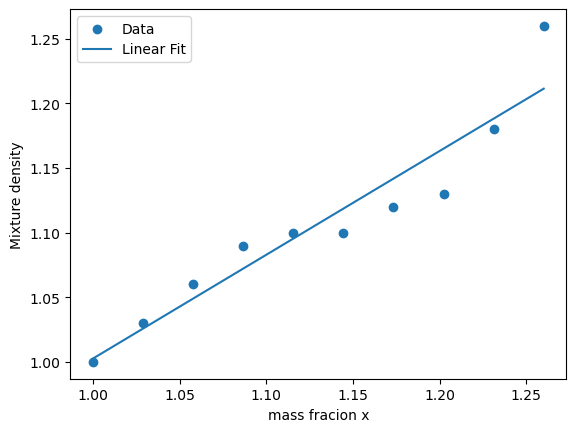

In [11]:
# Linear regression using NumPy only (JupyterLite compatible)
slope, intercept = np.polyfit(x,rho, 1)
y_pred = slope * x + intercept

# R^2 calculation
ss_res = np.sum((rho - y_pred)**2)
ss_tot = np.sum((rho - np.mean(rho))**2)
r2 = 1 - ss_res/ss_tot

print(f"rho = {slope:.6g} · x + {intercept:.6g}")
print(f"R² = {r2:.4f}")

# Plot with fitted line
x_line = np.linspace(x.min(), x.max(), 100)
y_line = slope * x_line + intercept

plt.figure()
plt.scatter(x, rho, label="Data")
plt.plot(x_line, y_line, label="Linear Fit")
plt.xlabel("mass fracion x")
plt.ylabel("Mixture density")
plt.legend()
plt.grid(False)
plt.show()

---
### IMPORTANT: Before closing the browser
Go to **File → Download → Notebook (.ipynb)** to save your work.
